# EPR-type entanglement of NDPA

$$\def \lk{\left(}
\def \rk{\right)}
\def \frop#1{\hat{\tilde{#1}}}
\def\thetap{\theta^\prime}
\def\ul#1{\underline{#1}}
\def\frvecop#1{\hat{\tilde{\underline{#1}}}}
\def\dul#1{\underline{\underline{#1}}}
\def\frmat#1{\tilde{\dul{#1}}}
\def\lk{\left(}
\def\rk{\right)}
\def\lka{\left\{}
\def\rka{\right\}}
\def\lsz{\left[}
\def\rsz{\right]}$$

## Intracavity field
$$\begin{align}
\frop{a} &= - \lk\nu\dul{\mathbb{1}} - \dul{\Delta} - i\sqrt{2\pi}\frmat{f}\rk^{-1}\frop{B} = 
\frmat{N}\ \frop{B} \\
\dul{\Delta} &= \left(\begin{matrix} 
(-i\kappa_a+\Delta_a) & 0 & ig & i\epsilon \\
0 & (-i\kappa_a-\Delta_a) & i\epsilon^* & ig^* \\
-ig^* & i\epsilon & (-i\kappa_b+\Delta_b) & 0 \\
i\epsilon^* & -ig & 0 & (-i\kappa_b-\Delta_b)\end{matrix}\right)\\
\sqrt{2\pi}\frmat{f} &= diag \left(k_ae^{i(\nu\tau_a+\phi_a)},k_ae^{i(\nu\tau_a-\phi_a)},k_be^{i(\nu\tau_b+\phi_b)},k_be^{i(\nu\tau_b-\phi_b)}\right)
\end{align}$$

### Input field
$$\begin{align}
\frvecop{B} &= -i\lsz\dul{\kappa}_1^{-1}\lk\dul{\kappa}_1^2+\sqrt{2\pi}\, \frmat{f}\rk\frvecop{a}_{1,in} + \dul{\kappa}_2\dul{L}_1\frvecop{\xi} \rsz = \frmat{A}\,\frvecop{a}_{1,in} + \dul{S}\,\frvecop{\xi}\\
\dul{\kappa}_n &= diag(\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,a}},\sqrt{2\kappa_{n,b}},\sqrt{2\kappa_{n,b}})\\
\dul{L}_1 &= diag(\sqrt{L_a},\sqrt{L_a},\sqrt{L_b},\sqrt{L_b})\\
\dul{L}_2 &= diag(\sqrt{1-L_a},\sqrt{1-L_a},\sqrt{1-L_b},\sqrt{1-L_b})\\
\end{align}$$
where $\frvecop{a}_{1,in}$ and $\frvecop{\xi}$ represent vacuum fields.

Therefore, the intracavity field has the following form:
$$\frvecop{a} = \frmat{N}\lk\frmat{A}\,\frvecop{a}_{1,in}+\dul{S}\,\frvecop{\xi}\rk$$

In [122]:
from sympy import *
import numpy as np
from IPython.display import display, Math, Latex
init_printing(use_unicode=True)

In [123]:
from sympy.assumptions.assume import global_assumptions
from sympy.solvers.solvers import check_assumptions

dma,dmb,dpa,dpb,eps,Lab,Lba = \
symbols('d_-a d_-b d_+a d_+b \epsilon \Lambda_ab \Lambda_ba')

ka,kb,ta,tb,phia,phib,La,Lb,kap1a,kap2a,kap1b,kap2b =\
symbols('k_a k_b \\tau_a \\tau_b \phi_a \phi_b L_a,L_b,\kappa_1a \kappa_2a \kappa_1b \kappa_2b')

xia,xida,xib,xidb,a1in,ad1in,b1in,bd1in,nu = \
symbols('\\xi_a \\xi^+_a \\xi_b \\xi^+_b a_1in a^+_1in b_1in b^+_1in \\nu')

kap1 = diag(sqrt(2*kap1a),sqrt(2*kap1a),sqrt(2*kap1b),sqrt(2*kap1b))
kap2 = diag(sqrt(2*kap2a),sqrt(2*kap2a),sqrt(2*kap2b),sqrt(2*kap2b))
L1   = diag(sqrt(La),sqrt(La),sqrt(Lb),sqrt(Lb))
L2   = diag(sqrt(1-La),sqrt(1-La),sqrt(1-Lb),sqrt(1-Lb))
ftil = diag(ka*exp(I*(nu*ta+phia)),ka*exp(I*(nu*ta-phia)),kb*exp(I*(nu*tb+phib)),kb*exp(I*(nu*tb-phib)))
ain  = Matrix([a1in,ad1in,b1in,bd1in])
xi   = Matrix([xia,xida,xib,xidb])

A    = -I*(kap1+kap1.inv()*ftil)
S    = -I*kap2*L1

N    = -I*Matrix([[dmb/Lab,0,0,eps/Lab],[0,dpb/Lba,conjugate(eps)/Lba,0],\
              [0,eps/Lba,dma/Lba,0],[conjugate(eps)/Lab,0,0,dpa/Lab]])


The intracavity field is:

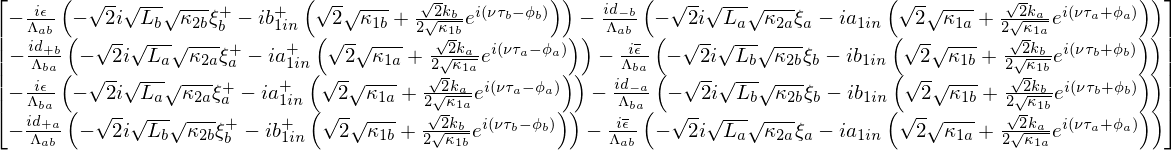

In [124]:
a = (N*(A*ain+S*xi))
a

So we have the following equations for the intracavity field:
$$\begin{align}
\frop{a}(\nu) &= -\frac{1}{\Lambda_{ab}(\nu)}\lsz\frac{d_{-b}(\nu)}{\sqrt{2\kappa_{1,a}}}\lk 2 \kappa_{1,a}+k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk \frop{a}_{1,in}(\nu)+\right.\\
&\quad\left. \frac{\epsilon}{\sqrt{2\kappa_{1,b}}}\lk 2\kappa_{1,b} + k_b e^{i\lk\nu\tau_b-\phi_b\rk}\rk\frop{b}^\dagger_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz =\\
&=-\frac{1}{\Lambda_{ab}(\nu)}\lsz d_{-b}(\nu) \alpha_1(\nu) \frop{a}_{1,in}(\nu)+\epsilon\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu) \rsz\\
\frop{a}^\dagger(-\nu) &=-\frac{1}{\Lambda_{ba}(\nu)}\lsz d_{+b}(\nu) \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+\epsilon^*\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}^\dagger_a(-\nu) +  \sqrt{\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu) \rsz\\
\frop{b}(\nu) &=-\frac{1}{\Lambda_{ba}(\nu)}\lsz \epsilon \alpha_1^*(-\nu) \frop{a}^\dagger_{1,in}(-\nu)+d_{-a}(\nu)\beta_1(\nu)\frop{b}_{1,in}(\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}_b(\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu) \rsz\\
\frop{b}^\dagger(-\nu) &=-\frac{1}{\Lambda_{ab}(\nu)}\lsz \epsilon^* \alpha_1(\nu) \frop{a}_{1,in}(\nu)+d_{+a}(\nu)\beta_1^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\right.\\
&\quad\left. \sqrt{\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}^\dagger_b(-\nu) +  \sqrt{\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu) \rsz
\end{align}$$

### Output field
$$\begin{align}
\frvecop{a}_{2,out} &= \hat{\tilde{\underline{a}}}_{2,in} + \dul{\kappa}_2\hat{\tilde{\underline{a}}} = \lk\dul{\kappa}_1\dul{\kappa}_2\rk^{-1}\frmat{F}\,\frvecop{a}_{1,in}+ \dul{\kappa}_2^{-1}\lk\frmat{F}+\dul{\kappa}_2^2\rk\hat{\tilde{\underline{a}}}=\dul{\kappa}_2^{-1}\lka\lsz\dul{\kappa}_1^{-1}\frmat{F}+\lk\frmat{F}+\dul{\kappa}_2^2\rk\frmat{N}\,\frmat{A}\rsz\frvecop{a}_{1,in}+ \lk\frmat{F}+\dul{\kappa}_2^2\rk\frmat{N}\,\dul{S}\,\frvecop{\xi}\rka=\\
&=\frmat{O}_1\frvecop{a}_{1,in}+\frmat{O}_2\frvecop{\xi}
\end{align}$$

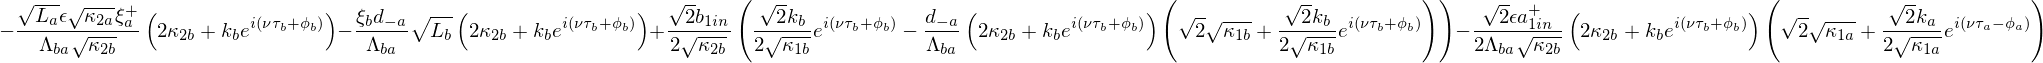

In [125]:
O1 = kap2.inv()*(kap1.inv()*ftil+(ftil+kap2**2)*N*A)
O2 = kap2.inv()*(ftil+kap2**2)*N*S
aout = O1*ain + O2*xi
aout[2]

Therefore the output fields have the following expressions:
$$\begin{align}
\frop{a}_{2,out}(\nu) &=  \overbrace{\lk \sqrt{1-L_a} e^{i\lk\nu\tau_a+\phi_a\rk}-\frac{d_{-b}(\nu)}{\Lambda_{ab}(\nu)}\alpha_1(\nu)\alpha_2(\nu)\rk}^{\frac{D_a(\nu)}{\Lambda_{ab}(\nu)}}\frop{a}_{1,in}(\nu)-\frac{\alpha_2(\nu)}{\Lambda_{ab}(\nu)}\lsz\sqrt{2\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu)+\right.\\
&\left.\quad+\epsilon\lk\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu)\rk\rsz=\\
&=\frac{1}{\Lambda_{ab}(\nu)}\lka D_a(\nu)\frop{a}_{1,in}(\nu)-\alpha_2(\nu)\lsz\sqrt{2\kappa_{2,a}L_a}d_{-b}(\nu)\frop{\xi}_a(\nu)+\epsilon\lk\beta^*_1(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,b}L_b}\epsilon\frop{\xi}^\dagger_b(-\nu)\rk\rsz\rka\\
\frop{a}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ba}(\nu)}\lka D^*_a(-\nu)\frop{a}^\dagger_{1,in}(-\nu)-\alpha^*_2(-\nu)\lsz\sqrt{2\kappa_{2,a}L_a}d_{+b}(\nu)\frop{\xi}^\dagger_a(-\nu)+\epsilon^*\lk\beta_1(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2,b}L_b}\epsilon^*\frop{\xi}_b(\nu)\rk\rsz\rka\\
\frop{b}_{2,out}(\nu)&= \frac{1}{\Lambda_{ba}(\nu)}\lka D_b(\nu)\frop{b}_{1,in}(\nu)-\beta_2(\nu)\lsz\sqrt{2\kappa_{2,b}L_b}d_{-a}(\nu)\frop{\xi}_b(\nu)+\epsilon\lk\alpha^*_1(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2,a}L_a}\epsilon\frop{\xi}^\dagger_a(-\nu)\rk\rsz\rka\\
\frop{b}^\dagger_{2,out}(-\nu) &= \frac{1}{\Lambda_{ab}(\nu)}\lka D^*_b(-\nu)\frop{b}^\dagger_{1,in}(-\nu)-\beta^*_2(-\nu)\lsz\sqrt{2\kappa_{2,b}L_b}d_{+a}(\nu)\frop{\xi}^\dagger_b(-\nu)+\epsilon^*\lk\alpha_1(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2,a}L_a}\epsilon^*\frop{\xi}_a(\nu)\rk\rsz\rka\\
\end{align}$$

## Quadrature variances

The quadratures of the two modes are:
$$\frop{X}_{\mu,\theta^\prime_\mu}=\frac{1}{2}\lk\frop{\mu}e^{-i\thetap_\mu/2}+\frop{\mu}^\dagger e^{i\thetap_\mu/2}\rk$$
The generalized quadratures involve both modes:
$$\frop{X}^G_{\thetap} = \frac{1}{\sqrt{2}}\lk X_{a,\thetap_a}- X_{b,\thetap_b}\rk$$



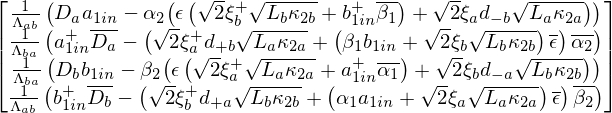

In [138]:
alpha1,beta1,alpha2,beta2,Da,Db = symbols('\\alpha_1 \\beta_1 \\alpha_2 \\beta_2 D_a D_b')
thetapa,thetapb,kapa,kapb = symbols('\\theta_pa \\theta_pb \kappa_a \kappa_b')
aout = Matrix([1/(Lab)*(Da*a1in-alpha2(sqrt(2*kap2a*La)*dmb*xia+eps*(conjugate(beta1)*bd1in+sqrt(2*kap2b*Lb)*xidb))),\
               1/(Lba)*(conjugate(Da)*ad1in-conjugate(alpha2)*(sqrt(2*kap2a*La)*dpb*xida+\
                                                              conjugate(eps)*(beta1*b1in+sqrt(2*kap2b*Lb)*xib))),\
               1/(Lba)*(Db*b1in-beta2(sqrt(2*kap2b*Lb)*dma*xib+eps*(conjugate(alpha1)*ad1in+sqrt(2*kap2a*La)*xida))),\
               1/(Lab)*(conjugate(Db)*bd1in-conjugate(beta2)*(sqrt(2*kap2b*Lb)*dpa*xidb+\
                                                              conjugate(eps)*(alpha1*a1in+sqrt(2*kap2a*La)*xia)))])
aout

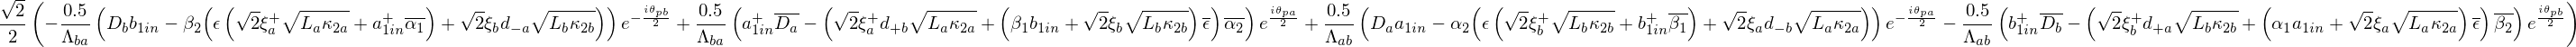

In [139]:
Xa = 1/2*(aout[0]*exp(-I*thetapa/2)+aout[1]*exp(I*thetapa/2))
Xb = 1/2*(aout[2]*exp(-I*thetapb/2)+aout[3]*exp(I*thetapb/2))
XG = 1/sqrt(2)*(Xa-Xb)
XG

So the expression of one of the quadratures is:
$$\begin{align}
\frop{X}_{\thetap}^G(\nu) &= \frac{\sqrt{2}}{4}\lka\frac{1}{\Lambda_{ab}}
\lsz \overbrace{\lk D_a(\nu)e^{-i\thetap_a/2}-\epsilon^*\alpha_1(\nu)\beta_2^*(-\nu)e^{i\thetap_b/2}\rk}^{M_{a}(\nu)}\frop{a}_{1,in}(\nu)-
\lk D^*_b(-\nu)e^{i\thetap_b/2}-\epsilon\alpha_2(\nu)\beta_1^*(-\nu) e^{-i\thetap_a/2}\rk\frop{b}^\dagger_{1,in}(-\nu)+\right.\right.\\
&\quad\left.\left.+\overbrace{\sqrt{2\kappa_{2a}L_a}\lk d_{-b}(\nu)\alpha_2(\nu)e^{-i\thetap_a/2}-\epsilon^*\beta^*_2(-\nu)e^{i\thetap_b/2}\rk}^{N_a(\nu)}\frop{\xi}_{a}(\nu)-
\sqrt{2\kappa_{2b}L_b}\lk d_{+a}(\nu)\beta^*_2(-\nu)e^{i\thetap_b/2}-\epsilon\alpha_2(\nu) e^{-i\thetap_a/2}\rk\frop{\xi}^\dagger_{b}(-\nu)\rsz+\right.\\
&\quad\left.+\rsz=\\
&= \frac{\sqrt{2}}{4}\lka\frac{1}{\Lambda_{ab}}
\lsz M_{a}(\nu)\lk\alpha(\nu)\frop{a}_{1,in}(\nu)+\sqrt{2\kappa_{2a}L_a}\frop{\xi}_a(\nu)\rk- M_{b}^*(-\nu)\lk\beta^*(-\nu)\frop{b}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2b}L_b}\frop{\xi}_b^\dagger(-\nu)\rk\rsz+\right.\\
&\left.\quad+\frac{1}{\Lambda_{ba}}
\lsz M^*_{a}(-\nu)\lk\alpha^*(-\nu)\frop{a}^\dagger_{1,in}(-\nu)+\sqrt{2\kappa_{2a}L_a}\frop{\xi}^\dagger_a(-\nu)\rk- M_{b}(\nu)\lk\beta(\nu)\frop{b}_{1,in}(\nu)+\sqrt{2\kappa_{2b}L_b}\frop{\xi}_b(\nu)\rk\rsz\rka
\end{align}$$

## Numerical calculations

Here I set the appropriate parameters and calculate the general quadrature variance in the units of dB.

In [1]:
from pylab import *
def quadr_spec(kapa=20.*pi,kapb=20.*pi,dela=0.,delb=0.,ra=1.,rb=1.,kta=0.,ktb=0.,phia=0.,phib=0.,La=100.,Lb=100.,\
               thetapa=-pi,thetapb=pi,x=1.,nui=-25.,nuf=25.,N=20000):
    
    nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
    eps = x*kapa
    Dela = kapa*dela
    Delb = kapb*delb
    ta   = kta/kapa
    tb   = ktb/kapb
    kap2a = kapa * ra
    kap2b = kapb * rb
    kap1a = kapa * (1-ra)
    kap1b = kapb * (1-rb)
    ka = 2*sqrt(ra*(1-ra)*(1-La/100))*kapa
    kb = 2*sqrt(rb*(1-rb)*(1-Lb/100))*kapb
    Ema = ka*exp(1j*(nu*ta-phia))
    Emb = kb*exp(1j*(nu*tb-phib))
    Epa = ka*exp(1j*(nu*ta+phia))
    Epb = kb*exp(1j*(nu*tb+phib))
    dma = kapa+1j*(nu-Dela) - Ema
    dmb = kapb+1j*(nu-Delb) - Emb
    dpa = kapa+1j*(nu+Dela) - Epa
    dpb = kapb+1j*(nu+Delb) - Epb
    Lab = abs(eps)**2 - dpa*dmb
    Lba = abs(eps)**2 - dpb*dma
    alpha = 1/sqrt(2*kap2a) * (2*kap1a+Epa)
    beta  = 1/sqrt(2*kap2b) * (2*kap1b+Epb)
    Da = Lab + 2*sqrt(kapa*kap2a)*dmb
    Db = Lba + 2*sqrt(kapb*kap2b)*dma
    Ma = Da/sqrt(2*kapa)*exp(-1j*thetapa/2) - sqrt(2*kap2b)*conjugate(eps)*exp(1j*thetapb/2)
    Mb = Db/sqrt(2*kapb)*exp(-1j*thetapb/2) - sqrt(2*kap2a)*conjugate(eps)*exp(1j*thetapa/2)
    
    XXG = 1/2*(abs(Ma)**2/abs(Lab)**2*(abs(alpha)**2+2*kap2a*La/100)+abs(Mb)**2/abs(Lba)**2*(abs(beta)**2+2*kap2b*Lb/100))
    Sout = 10*np.log10(XXG)
    
    plot(nu/2/pi,Sout,linewidth=2.0)
    xlabel('$\\nu/2\pi$')
    ylabel('$S_{out,\\theta^\prime}(\\nu)$')
    xlim(nui,nuf)
    ylim(-50,30)
    grid(True)
    show()
    print(alpha)

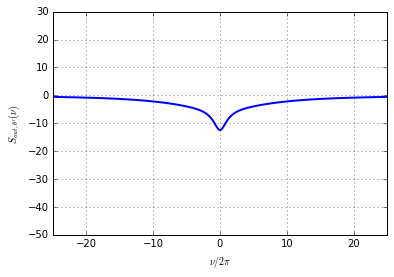

[ 0.+0.j  0.+0.j  0.+0.j ...,  0.+0.j  0.+0.j  0.+0.j]


In [2]:
%matplotlib inline
from ipywidgets import interactive
from IPython.display import display
slider = interactive(quadr_spec,kapa=(0.,20*pi,),kapb=(0.,20*pi),dela=(0.,2.),delb=(0.,2),ra=(0.,1.),rb=(0.,1.),\
                     kta=(0.,10.,0.0001),ktb=(0.,10.,0.0001),phia=(0.,2.*pi),phib=(0.,2.*pi),La=(0,100),Lb=(0,100),\
                     thetapa=(-pi,pi,.0001),thetapb=(-pi,pi,0.0001),x=(0.,2.,0.001),nui=(-25.,0.),nuf=(0.,25.),N=(1000,20000))
display(slider)


## Singularities

If one calculates the quadrature variance $\left<\frop{X}^G_{\pm,\thetap}(\nu),\frop{X}^G_{\pm,\thetap}(\nu^\prime)\right>$, then the obtained expression has a singularity when $\left|\Lambda_{ab}\right|^2=0$. To find this condition, let us take a closer look at expression $\Lambda_{ab}$.
$$\begin{align}
\Lambda_{ab}(\nu) &= |\epsilon|^2-d_{+a}(\nu)d_{-b}(\nu) = |\epsilon|^2-\lk\kappa_a + i\lk\nu+\Delta_a\rk - k_a e^{i\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b + i\lk\nu-\Delta_b\rk - k_b e^{i\lk\nu\tau_b-\phi_b\rk}\rk\\
d_{\pm,\mu} &= \kappa_\mu + i\lk\nu\pm\Delta_\mu\rk - k_\mu e^{i\lk\nu\tau_\mu\pm\phi_\mu\rk} 
\end{align}$$

The denominator:
$$\begin{align}
\lka|\epsilon|^2-\lsz\lk\kappa_a-k_a\cos{\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b-k_b\cos{\lk\nu\tau_b-\phi_b\rk}\rk-
\lk\nu+\Delta_a-k_a\sin{\lk\nu\tau_a+\phi_a\rk}\rk\lk\nu-\Delta_b-k_b\sin{\lk\nu\tau_b-\phi_b\rk}\rk\rsz\rka^2+
\lsz\lk\nu+\Delta_a-k_a\sin{\lk\nu\tau_a+\phi_a\rk}\rk\lk\kappa_b-k_b\cos{\lk\nu\tau_b-\phi_b\rk}\rk+
\lk\nu-\Delta_b-k_b\sin{\lk\nu\tau_b-\phi_b\rk}\rk\lk\kappa_a-k_a\cos{\lk\nu\tau_a+\phi_a\rk}\rk\rsz^2
\end{align}$$

In [41]:
from sympy.solvers import solve
Dela, Delb = symbols('\Delta_a \Delta_b')
E1, E2, E3, E4 = symbols('E_1 E_2 E_3 E_4')
E1 = kapa-ka*cos(nu*ta+phia)
E2 = kapb-kb*cos(nu*tb-phib)
E3 = nu+Dela-ka*sin(nu*ta+phia)
E4 = nu-Delb-kb*sin(nu*tb-phib)

Solution of the first term=0

In [ ]:
solve(Abs(eps)**2-(E1*E2-E3*E4),ta)

Solution of the second term=0